In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# 7z1018, 18-19, In-Class Test 2

The aim of this in-class coursework is to support and assess your ability to perform basic data analytics using Python and Pandas.

Save a local copy of this notebook using the filename `7z1018-1819-in_class_test_2-firstname_surname_MMUID`. 

Answer all questions entirely within the notebook, which you must then upload through Moodle before the end of the lab session.

You may use any resources you want (either online or offline). The only limitation is that this must be your own work. Therefore, you may not discuss the questions with a neighbour, nor use your phone, email, Facebook, WhatsApp, and similar.

You will need to download the `ManchesterEducation.csv` dataset from the Moodle area and store it locally (ideally, on the same directory as this notebook) to complete the questions below. This dataset, accessible from [Manchester City Council's Intelligence Hub](https://www.manchester.gov.uk/info/200088/statistics_and_intelligence/7611/intelligence_hub), contains extensive information about students in both primary and secondary school in all Manchester council wards. Additionally, you will need to download the `ManchesterPopulationCount.csv` dataset from the Moodle area which contains the total population in each ward.

Please make sure that you submit your notebook, with the filename as specified below, by the end of the session using the Moodle assignment submission link provided under this week's (week 9) section.

**Please Note:** When asked to produce a chart, top marks will be awarded based on the quality of the chart. Also, for the purposes of this test, treat the data as if it were sample data not population data.

### Q1: Load the dataset ManchesterEducation.csv and show the last four rows. [3 marks] <a name="paragraph1"></a>

In [3]:
#read csv file into dataframe store in variable
manEd_df = pd.read_csv('data/ManchesterEducation.csv')
#display first 5 rows of dataset
manEd_df.head()

,Name,Parliamentary Constituency,Number of Pupils - 2017,Primary School attendance (%) - 2017,Secondary School attendance (%) - 2017,Primary School absence (%) - 2017,Secondary School absence (%) - 2017,Primary School persistent absence (%) - 2017,Secondary School persistent absence (%) - 2017,English not first language of school pupils (%) - 2017,...,Key Stage 2 pupils achieving Level 4 and above in Reading (%) - 2017,Key Stage 2 pupils achieving Level 4 and above in Writing (%) - 2017,Key Stage 2 pupils achieving Level 4 and above in Maths (%) - 2017,"Key Stage 2 pupils achieving Level 4 and above in Reading, Writing and Maths (%) - 2017",GCSE Attainment 8 (%) - 2017,GCSE pupils achieving A* to C in English and Maths (%) - 2017,Key Stage 2 Pupils Progress Score in Reading - 2017,Key Stage 2 Pupils Progress score in Writing - 2017,Key Stage 2 Pupils Progress Score in Maths - 2017,GCSE Progress 8 Score - 2017
0,Ancoats & Beswick,Manchester Central,1286,96.2,93.6,3.8,6.4,9.0,21.5,35.1,...,77.4,81.0,83.3,67.9,34.6,14.3,0.37,2.12,1.09,-0.63
1,Ardwick,Manchester Central,2751,96.2,95.1,3.8,4.9,7.4,13.6,55.9,...,68.1,69.8,78.4,59.5,39.8,31.5,-0.16,-0.51,1.03,-0.38
2,Baguley,Wythenshawe and Sale East,2462,95.4,93.9,4.6,6.1,11.8,16.9,13.4,...,72.1,75.1,79.6,66.2,37.0,20.2,-0.18,-0.07,0.33,-0.68
3,Brooklands,Wythenshawe and Sale East,1474,95.9,94.5,4.1,5.5,9.0,17.0,13.1,...,88.3,84.7,84.7,80.2,37.1,15.2,2.45,2.07,2.62,-0.77
4,Burnage,Manchester Withington,3565,95.7,94.3,4.3,5.7,8.5,13.8,41.8,...,68.8,74.6,81.6,59.6,44.8,36.2,0.65,0.56,2.42,0.04


### Q2: Plot a bar chart of the percentage of pupils achieving A\* to C in English and Maths per ward. [6 marks] <a name="paragraph2"></a>

Text(0.5,0.98,'percentage of pupils achieving A* to C in English and Maths per ward')

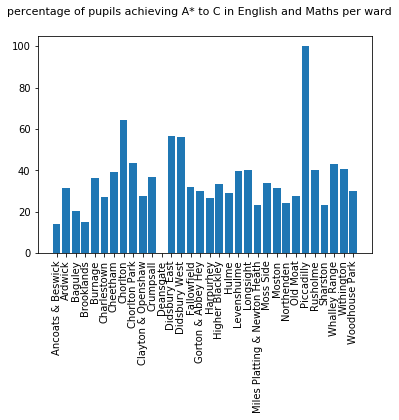

In [67]:
yvar = manEd_df['GCSE pupils achieving A* to C in English and Maths (%) - 2017']
xvar = manEd_df['Name']
fig = plt.figure()
plt.xticks(rotation=90)
plt.bar(xvar, yvar)
fig.suptitle('percentage of pupils achieving A* to C in English and Maths per ward', fontsize=11)

### Q3: Plot a histogram of the number of pupils per ward. [5 marks] <a name="paragraph3"></a>

Text(0.5,0.98,'number of pupils per ward')

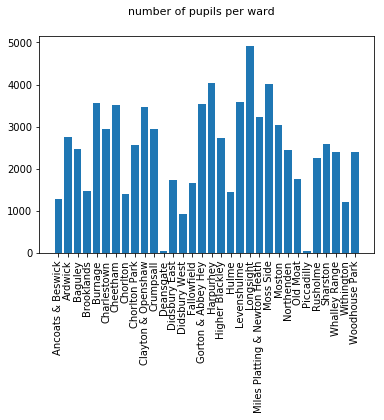

In [66]:
yvar = manEd_df['Number of Pupils - 2017']
xvar = manEd_df['Name']
fig = plt.figure()
plt.xticks(rotation=90)

plt.bar(xvar, yvar)

fig.suptitle('number of pupils per ward', fontsize=11)

### Q4: Which ward has the highest Attainment 8 score? [4 marks]

In [32]:
manEd_df[['Name','GCSE Attainment 8 (%) - 2017']].max()

Name                            Woodhouse Park
GCSE Attainment 8 (%) - 2017                67
dtype: object

### Q5: Plot a scatter plot comparing the percentage of pupils in a ward for whom English is not their first language with the percentage of primary school pupils claiming free school meals. [7 marks]

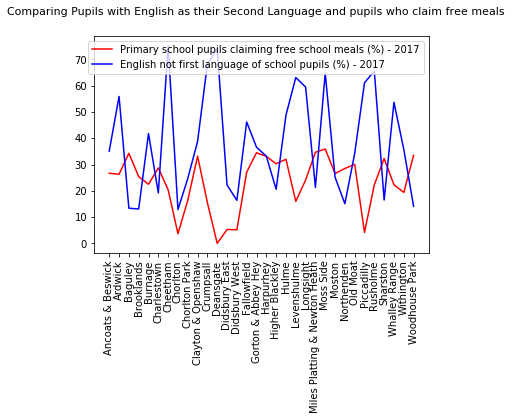

In [54]:
plotDataEng= manEd_df['English not first language of school pupils (%) - 2017']
plotName = manEd_df['Name']
plotDataDin = manEd_df['Primary school pupils claiming free school meals (%) - 2017']

fig = plt.figure()
plt.plot(plotName, plotDataDin, 'r',label='Primary school pupils claiming free school meals (%) - 2017') 
plt.plot(plotName, plotDataEng, 'b', label='English not first language of school pupils (%) - 2017')
plt.xticks(rotation=90)
plt.legend(loc='best')
fig.suptitle('Comparing Pupils with English as their Second Language and pupils who claim free meals', fontsize=11)

plt.show()

### Q6: Calculate Pearson’s Correlation Coefficient between the percentage of pupils in a ward for whom English is not their first language and the percentage of primary school pupils claiming free school meals. [4 marks]


In [70]:
DataEng= manEd_df['English not first language of school pupils (%) - 2017']
DataDin = manEd_df['Primary school pupils claiming free school meals (%) - 2017']


np.square(stats.pearsonr(DataEng,DataDin)[0])

0.05098246895910828

The result shows that 5.1% of the variance in the values of Primary school pupils claiming free school meals (%) - 2017 is explained by the variance in values of English not first language of school pupils (%) - 2017.

### Q7: There are 7,912,750 pupils in England. What percentage of those pupils are in Manchester? [4 marks]

In [83]:
totalMan = manEd_df['Number of Pupils - 2017'].sum()
totalEng = 7912750
ManPer = (totalMan/totalEng)*100
ManPer

0.9915263340810717

### Q8: Across Manchester, what is the mean percentage of Key Stage 2 pupils achieving Level 4 or above in Reading, Writing and Maths (give the mean percentages for each subject individually). [6 marks]


In [89]:
ReadingMean = manEd_df['Key Stage 2 pupils achieving Level 4 and above in Reading (%) - 2017'].mean()
WritingMean = manEd_df['Key Stage 2 pupils achieving Level 4 and above in Writing (%) - 2017'].mean()
MathsMean = manEd_df['Key Stage 2 pupils achieving Level 4 and above in Maths (%) - 2017'].mean()


print("The Mean for Reading is %s ,The Mean for Writing is %s and The Mean for Maths is %s" % (ReadingMean, WritingMean, MathsMean))

The Mean for Reading is 71.05624999999999 ,The Mean for Writing is 76.615625 and The Mean for Maths is 78.190625


### Q9: Is there a statistically significant difference between the percentages of Key Stage 2 pupils achieving Level 4 or above in Reading compared to Writing? Show your working. [8 marks]


In [96]:
Reading = manEd_df['Key Stage 2 pupils achieving Level 4 and above in Reading (%) - 2017']
Writing = manEd_df['Key Stage 2 pupils achieving Level 4 and above in Writing (%) - 2017']
stats.ttest_rel(Reading, Writing)

Ttest_relResult(statistic=-4.019169404878355, pvalue=0.00034633906265433016)

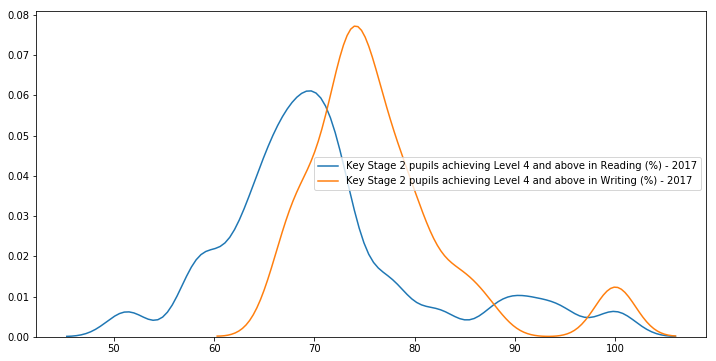

In [97]:
fig = plt.figure(figsize=(12,6))
sns.kdeplot(Reading,bw=2)
sns.kdeplot(Writing,bw=2)

In [98]:
diffs = Reading- Writing
(np.mean(Writing)-np.mean(Reading))/np.std(diffs)

0.7218641348599505

In [99]:
t,p = stats.ttest_rel(Writing,Reading)
t/np.sqrt(len(manEd_df))

0.7104954852317462

### Q10: Is there a statistically significant correlation between the percentage of primary school attendance and secondary school attendance? Show your working. [6 marks]


/home/danny/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


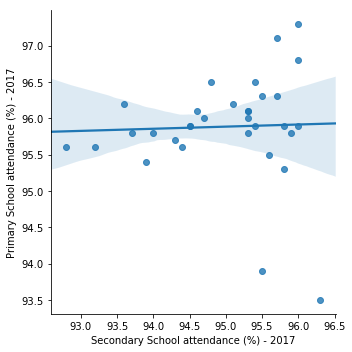

In [101]:
ax = sns.lmplot(x='Secondary School attendance (%) - 2017',y='Primary School attendance (%) - 2017',data=manEd_df,fit_reg=True)

### Q11: Using the data from `ManchesterPopulationCount.csv`, which ward has the highest and lowest proportion of pupils relative to overall population? [8 marks]


In [108]:
totalMan = manEd_df['Number of Pupils - 2017'].sum()

(manEd_df['Number of Pupils - 2017'] / totalMan)*100

0     1.639114
1     3.506379
2     3.138025
3     1.878736
4     4.543890
5     3.742177
6     4.473788
7     1.790790
8     3.283327
9     4.420256
10    3.763845
11    0.063729
12    2.213952
13    1.191736
14    2.111985
15    4.506927
16    5.144219
17    3.477064
18    1.848146
19    4.565558
20    6.258205
21    4.127101
22    5.120002
23    3.869636
24    3.111258
25    2.247091
26    0.068828
27    2.890755
28    3.317741
29    3.066648
30    1.544795
31    3.074295
Name: Number of Pupils - 2017, dtype: float64

### Q12: Plot a line graph showing the following three series: primary school attendance, secondary school attendance and percentage of Key Stage 2 pupils achieving Level 4 or above in Reading, Writing and Maths (combined). [10 marks]


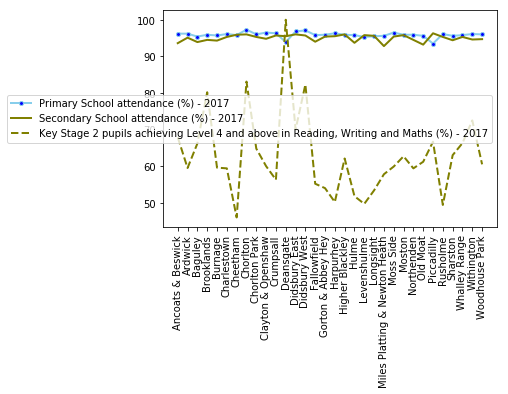

In [117]:


plt.plot( 'Name','Primary School attendance (%) - 2017',data=manEd_df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=2)
plt.plot( 'Name', 'Secondary School attendance (%) - 2017', data=manEd_df, marker='', color='olive', linewidth=2)
plt.plot( 'Name', 'Key Stage 2 pupils achieving Level 4 and above in Reading, Writing and Maths (%) - 2017', data=manEd_df, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.xticks(rotation=90)
plt.legend()

### Q13: Draw a boxplot of the percentages of pupils achieving Level 4 or above in Reading, Writing and Maths (each subject individually). [8 marks]


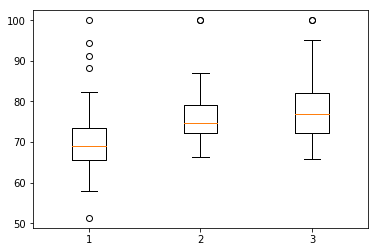

In [136]:
data = [manEd_df['Key Stage 2 pupils achieving Level 4 and above in Reading (%) - 2017'],manEd_df['Key Stage 2 pupils achieving Level 4 and above in Writing (%) - 2017'], manEd_df['Key Stage 2 pupils achieving Level 4 and above in Maths (%) - 2017'] ]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()


### Q14: Is the percentage of pupils for whom English is not their first language the same (statistically speaking) for all Parliamentary Consituencies? If not, which consituencies are different? [8 marks]

In [ ]:
#Ran out of time

### Q15: Create a new feature called “Good School” whose values are “High” if more than 75% of the pupils in the ward attended a good or better secondary school; “Medium” if between 50% and 74.9% did and “Low” otherwise. [6 marks]


In [ ]:
#Would use the numpy function where to go through each ward to compare the value of the column with the criteria
#stated above

### Q16: What is the median percentage of pupils achieving A\* to C in English and Maths for the three values of “Good School”? [3 marks]


In [ ]:
# would create 3 different variables which contained the entries with the relevant good school value.
#I would then use the numpy meidian function to compute the median of each

### Q17: Find the 95% confidence interval for the average percentage of Early Years Foundation Stage children achieving Good Level of Development across all wards. [4]

In [ ]:
#Ran out of time